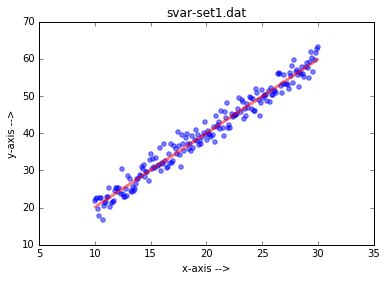

                     0                  1       2
0                    #              name:    set1
1                    #              type:  matrix
2                    #              rows:     200
3                    #           columns:       2
4    29.69849246231156  59.71661693602071    None
5    12.51256281407035  23.73252144978657    None
6    29.49748743718593  60.10478414366307    None
7    21.75879396984925  44.08007551606463    None
8    13.51758793969849  24.52516389940249    None
9    26.68341708542714  52.59123925289686    None
10    12.1105527638191  24.09790739170643    None
11   20.25125628140703  39.77573515123095    None
12   12.61306532663317  22.80023969588674    None
13   17.63819095477387  34.02273643430492    None
14   28.19095477386935  55.53477003083449    None
15   15.42713567839196  30.62741721750934    None
16    11.4070351758794  20.23009768637258    None
17   13.41708542713568  25.40439278573317    None
18   15.32663316582915  30.95423865783515    None


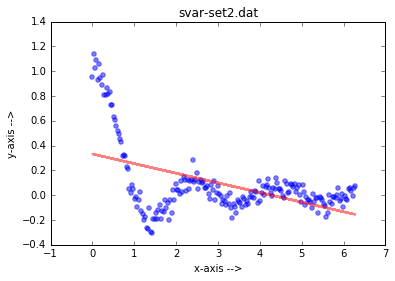

                      0                      1       2
0                     #                  name:    set2
1                     #                  type:  matrix
2                     #                  rows:     200
3                     #               columns:       2
4    0.7577710923231662     0.3281640823970478    None
5     3.599412688535039   -0.01318636434710183    None
6     4.199314803290879     0.1312429212494962    None
7      4.26246239431781    0.01440296550640596    None
8     4.230888598804345    0.05434596097022962    None
9     2.715346414158012     0.0591919910690206    None
10    6.156890125125726     0.0579754374806327    None
11    4.073019621237019    0.07324981691943128    None
12    4.104593416750483    0.00548481963279009    None
13    1.641837366700194    -0.1942255335845428    None
14    5.178102464208302   -0.03925344756055267    None
15   0.1578689775673263      1.060532837817737    None
16   0.7261972968097009     0.3128823923967042    None
17   0.852

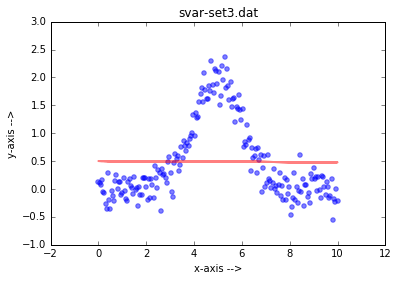

                      0                     1       2
0                     #                 name:    set3
1                     #                 type:  matrix
2                     #                 rows:     200
3                     #              columns:       2
4     4.623115577889448     1.838085008663974    None
5     8.793969849246231  -0.06971109733031068    None
6     8.994974874371859    0.3747059468470624    None
7     8.040201005025127     -0.46400448206539    None
8     3.668341708542714    0.6782342647269262    None
9     2.311557788944724   -0.1696227282525412    None
10    3.869346733668342    0.9427087443504245    None
11    1.306532663316583    0.1786213926129892    None
12   0.2512562814070352  -0.07585501061226627    None
13    9.346733668341709     0.239996054939726    None
14    7.185929648241206    0.1423727713625793    None
15    5.527638190954774     1.915708644195693    None
16    1.155778894472362   -0.1864777492601126    None
17    4.572864321608041     

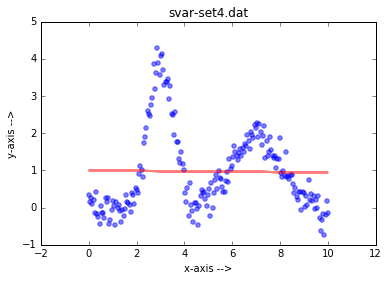

                      0                      1       2
0                     #                  name:    set4
1                     #                  type:  matrix
2                     #                  rows:     200
3                     #               columns:       2
4     3.969849246231156      1.008692872827001    None
5     5.778894472361809     0.9613524634187072    None
6      6.78391959798995      2.044366731847647    None
7      9.49748743718593       0.19929691650573    None
8     3.467336683417086      2.511682986077576    None
9    0.1507537688442211    0.09925405959597407    None
10    8.090452261306533     0.8282333344145816    None
11    5.326633165829146     0.8820193675077663    None
12    9.296482412060302     0.3540292540368054    None
13    7.939698492462312      1.312230668708114    None
14    2.864321608040201       4.28621366152549    None
15    9.346733668341709     0.1875855614133842    None
16    5.075376884422111    -0.2187850424812959    None
17    9.94

In [25]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn import datasets, linear_model

# THIS IS TO READ FROM A DAT FILE AND GET A LIST OF LIST WITH WITH EACH COULOUMN AS A LIST
getListFromAFile= lambda filename:np.loadtxt(filename, unpack=True)
# returning the list of all the file  in the folder
getListOfFiles = lambda directoryPath :[f for f in os.listdir(directoryPath) if os.path.isfile(os.path.join(directoryPath, f))] # this is to list all files

# THIS IS TO CREATE A SIMPLE 2D PLOTS SCATTER PLOTS
def createPlots(inputList,xlabel="x-axis -->",ylabel="y-axis -->",title="file-Name-Title"):
    #this is for linear regression
    clf = linear_model.LinearRegression()
    clf.fit(inputList[0].reshape(-1,1),inputList[1])
    plt.plot(inputList[0],clf.predict(inputList[0].reshape(-1,1)),alpha=0.5,color ='r', linewidth=2) 
  
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.scatter(inputList[0],inputList[1],alpha=0.5,color ='b')
    plt.show()

def showDataInFile(directoryPath):
    with open("Data/"+directoryPath,'r') as f:
        next(f) # skip first row
        df = pd.DataFrame(l.rstrip().split() for l in f)
        df.boxplot
        print(df)


# displaying all the files in Data/ folder  and ploting them
for s in getListOfFiles('Data/'):
    createPlots(getListFromAFile("Data/"+s),'x-axis -->','y-axis -->',s)
    showDataInFile(s)

In [13]:
# APPLYING KFOLDS ALGORITHM
def k_fold_cross_validation(X, K, randomise = False):
    
    if randomise: from random import shuffle; X=list(X); shuffle(X)
    for k in xrange(K):
        training = [x for i, x in enumerate(X) if i % K != k]
        validation = [x for i, x in enumerate(X) if i % K == k]
        yield training, validation

X = [i for i in xrange(97)]
for training, validation in k_fold_cross_validation(X, K=7):
    for x in X: assert (x in training) ^ (x in validation), x

In [ ]:
from sklearn import datasets, linear_model



with open('Data/svar-set1.dat','r') as f:
    next(f) # skip first row
    df = pd.DataFrame(l.rstrip().split() for l in f)
    df.boxplot
print(df)
    